In [37]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

In [38]:
from sklearn import linear_model

Будем работать с датасетом из библиотеки sklearn о домах в Бостоне. 

Этот набор данных содержит информацию, собранную службой переписи населения США и касающуюся жилья в районе Бостона, штат Массачусетс.

Данный датасет содержится в модуле datasets библиотеки sklearn. 

Давайте загрузим датасет с помощью функции load_boston() и выведем его описание, обратившись по ключу 'DESCR':

In [39]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

В данном описании говорится, что у нас есть 506 участков с жилыми домами, которые описываются 13-ю признаками. 

На каждом из участков находится несколько домов. Измерены общие показатели по каждому из участков, в том числе медианная стоимость.

### Задача — научить модель предсказывать медианную стоимость дома на участке.

In [40]:
from sklearn.datasets import load_boston 

boston = load_boston()

# создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, # данные
    columns=boston.feature_names # наименования столбцов
)

TARGET_FEATURE = 'MEDV'

# добавляем в таблицу столбец с целевой переменной
boston_data[TARGET_FEATURE] = boston.target
 

# Составляем список факторов (исключили целевой столбец)
features = boston_data.drop(TARGET_FEATURE, axis=1).columns

# Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data[TARGET_FEATURE]

In [41]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Итак, давайте разделим нашу выборку на тренировочную и тестовую в соотношении 70/30:

In [42]:
from sklearn.model_selection import train_test_split

# Разделяем выборку на тренировочную и тестовую в соотношении 70/30
# Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


После разделения в тренировочной выборке оказались 354 наблюдения, а в тестовой — 152.

Затем обучим линейную регрессию (с помощью МНК) на тренировочных данных и рассчитаем  для тренировочных и тестовых данных:

In [43]:
from sklearn import linear_model

In [44]:
# Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
# Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
# Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)

# Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)

In [45]:
from sklearn import metrics

In [46]:
 
print(f'Train R^2: {metrics.r2_score(y_train, y_train_predict):.3f}')
print(f'Test R^2: {metrics.r2_score(y_test, y_test_predict):.3f}')

Train R^2: 0.743
Test R^2: 0.722


# ПОЛИНОМИАЛЬНЫЕ ПРИЗНАКИ

In [47]:
from sklearn import preprocessing

In [48]:
# Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

# Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)

#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)

#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)


In [49]:
# Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()

# Обучаем модель по МНК
lr_model.fit(X_train_poly, y_train)
 
# Делаем предсказание для тренировочной выборки
y_train_poly_predict = lr_model.predict(X_train_poly)

# Делаем предсказание для тестовой выборки
y_test_poly_predict = lr_model.predict(X_test_poly)

In [50]:
 
print(f'Train R^2: {metrics.r2_score(y_train, y_train_poly_predict):.3f}')
print(f'Test R^2: {metrics.r2_score(y_test, y_test_poly_predict):.3f}')

Train R^2: 0.929
Test R^2: 0.268


Метрика значительно ниже, чем на тренировочном наборе. 

Это и есть переобучение модели. Из-за своей сложности (количества факторов) 

модель полностью адаптировалась под тренировочные данные, 

но взамен получила высокий разброс в показателях на данных, которые она не видела ранее. 

### РЕГУЛЯРИЗАЦИЯ



In [51]:
# Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()

# Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)

# Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)

# Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)
 
# Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

# Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)

# Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)

# Выводим результирующие размерности таблиц
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(354, 104)
(152, 104)


In [52]:
# Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.1)

# Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

# Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.879
Test R^2: 0.882


Давайте выведем значения коэффициентов модели, округлив их до третьего знака после запятой:

In [53]:
print(np.round(lasso_lr_poly.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


In [54]:
# Коэффициенты для каждого признака
len(lasso_lr_poly.coef_)

104

Обратите внимание: большая часть коэффициентов обнулилась. 

Это значит, что признаки, которые соответствуют этим коэффициентам, не используются в прогнозе модели Lasso-регрессии.

In [55]:
# Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=20)

# Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

# Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.898
Test R^2: 0.883


In [56]:
print(np.round(ridge_lr_poly.coef_, 3))

[ 1.000e-03  1.400e-02 -1.640e-01  1.060e-01 -7.480e-01  2.748e+00
 -8.220e-01 -1.084e+00  6.280e-01 -7.590e-01 -6.890e-01  7.600e-01
 -2.481e+00  2.600e-02 -4.000e-03  3.280e-01  1.860e+00 -4.080e-01
  7.220e-01  3.980e-01 -1.420e-01 -5.110e-01  2.720e-01 -1.610e-01
  1.200e-02  1.510e-01  1.730e-01 -8.500e-02  8.100e-02  2.600e-01
  1.050e-01 -3.150e-01 -2.660e-01  4.400e-02  4.580e-01  1.610e-01
 -1.900e-01 -1.660e-01  4.580e-01  2.160e-01  4.760e-01  2.300e-02
  4.010e-01  6.060e-01  9.500e-02  3.800e-02 -5.700e-02  9.800e-02
 -2.960e-01  3.750e-01 -1.123e+00 -7.760e-01  2.820e-01 -6.000e-03
  5.300e-02  4.220e-01 -5.600e-02 -2.880e-01 -6.820e-01 -2.310e-01
 -4.770e-01 -3.320e-01  6.390e-01 -5.510e-01  1.510e-01 -3.360e-01
 -1.800e-02  2.280e-01  2.370e-01 -3.820e-01 -4.000e-03 -7.050e-01
 -4.890e-01 -6.470e-01  1.850e-01 -8.280e-01  8.600e-02  6.900e-02
  6.730e-01  1.190e-01 -4.000e-03 -7.350e-01 -6.380e-01  7.590e-01
 -1.820e-01  3.200e-02 -1.100e-02 -3.430e-01  7.560e-01 -5.200

Видно, что L2-регуляризация не обнуляет коэффициенты — она использует для предсказания все признаки.

### Давайте организуем процесс перебора параметров модели: 
создадим цикл, в котором будем перебирать 20 различных значений alpha в диапазоне от 0.001 до 1. 

Такой список проще всего создать с помощью функции linspace() из библиотеки numpy.

В цикле будем обучать модель линейной регрессии и L1-регуляризацией (Lasso), 

вычислять значения метрики  на тренировочной и тестовой выборках и заносить результаты в списки train_scores и test_scores:

In [57]:
# Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.01, 0.3, 20)

# Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []

for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    
    # Обучаем модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    # Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    
    # Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    
    # Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

In [58]:
scores_df = pd.DataFrame({'alpha': alpha_list, 'train_scores': train_scores, 'test_scores': test_scores})
scores_df['diff_scores'] = scores_df['test_scores'] - scores_df['train_scores']

In [59]:
scores_df

,alpha,train_scores,test_scores,diff_scores
0,0.010000,0.920595,0.762602,-0.157993
1,0.025263,0.908033,0.859732,-0.048301
2,0.040526,0.899773,0.885927,-0.013846
3,0.055789,0.892884,0.890293,-0.002591
4,0.071053,0.887760,0.886409,-0.001350
5,0.086316,0.882985,0.883543,0.000558
6,0.101579,0.878378,0.881944,0.003566
7,0.116842,0.874888,0.881147,0.006259
8,0.132105,0.871063,0.879873,0.008810
9,0.147368,0.866751,0.877595,0.010844


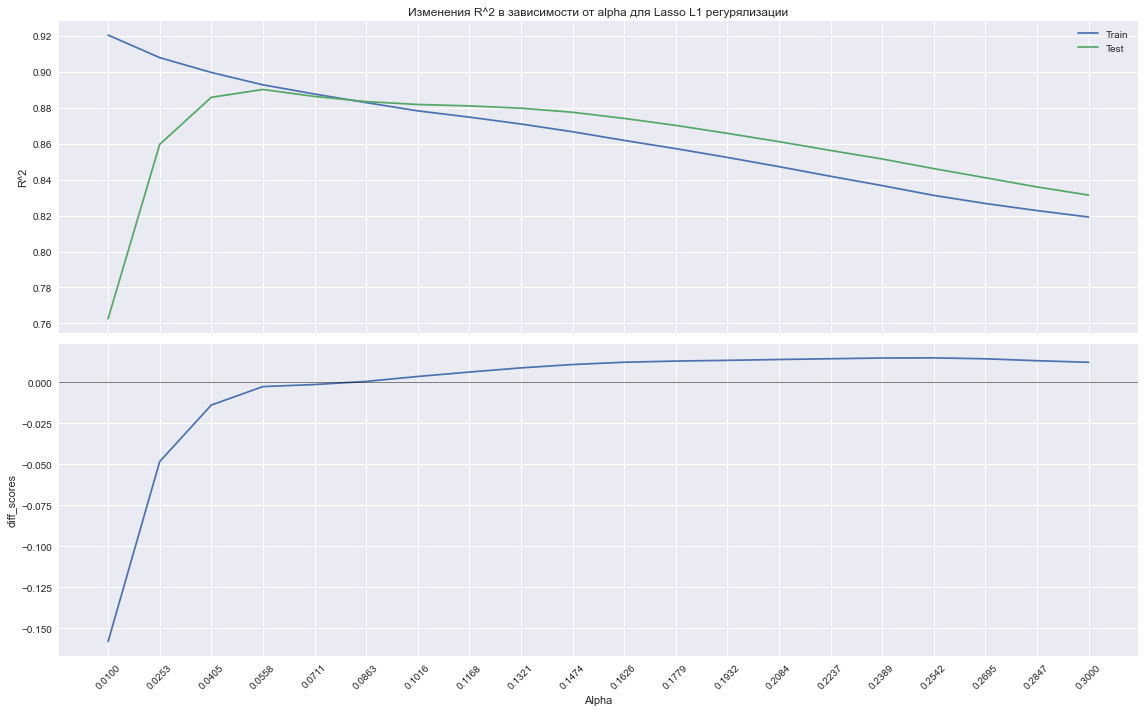

In [60]:
# Визуализируем изменение R^2 в зависимости от alpha
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(16, 10), sharex=True) # фигура + координатная плоскость
ax0.set_title('Изменения R^2 в зависимости от alpha для Lasso L1 регурялизации')
ax0.plot(alpha_list, train_scores, label='Train') # линейный график для тренировочной выборки
ax0.plot(alpha_list, test_scores, label='Test') # линейный график для тестовой выборки
ax1.plot(alpha_list, scores_df['diff_scores']) # разница в значениях метрики между train-test, фактически разброс

ax1.set_xlabel('Alpha') # название оси абсцисс
ax0.set_ylabel('R^2') # название оси ординат
ax1.set_ylabel('diff_scores') # название оси ординат

ax1.set_xticks(alpha_list) # метки по оси абсцисс
ax1.xaxis.set_tick_params(rotation=45) # поворот меток на оси абсцисс
ax1.axhline(0, color='black', linewidth=0.5)

ax0.legend() # отображение легенды
plt.tight_layout(); # подгонка графиков

In [61]:
alpha = 0.0558

# Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=alpha)

# Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

# Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.893
Test R^2: 0.890


In [62]:
# Создаём список из 30 значений
alpha_list = np.linspace(20, 50, 60)

# Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []

for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L2-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    
    # Обучаем модель
    ridge_lr_poly.fit(X_train_scaled_poly, y_train)
    
    # Делаем предсказание для тренировочной выборки
    y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
    
    # Делаем предсказание для тестовой выборки
    y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
    
    # Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

In [63]:
scores_df = pd.DataFrame({'alpha': alpha_list, 'train_scores': train_scores, 'test_scores': test_scores})
scores_df['diff_scores'] = scores_df['test_scores'] - scores_df['train_scores']

In [64]:
scores_df

,alpha,train_scores,test_scores,diff_scores
0,20.000000,0.898290,0.883280,-0.015009
1,20.508475,0.897919,0.883875,-0.014044
2,21.016949,0.897553,0.884411,-0.013142
3,21.525424,0.897192,0.884891,-0.012301
4,22.033898,0.896837,0.885321,-0.011515
5,22.542373,0.896486,0.885704,-0.010782
6,23.050847,0.896140,0.886043,-0.010097
7,23.559322,0.895798,0.886341,-0.009458
8,24.067797,0.895461,0.886600,-0.008861
9,24.576271,0.895127,0.886824,-0.008303


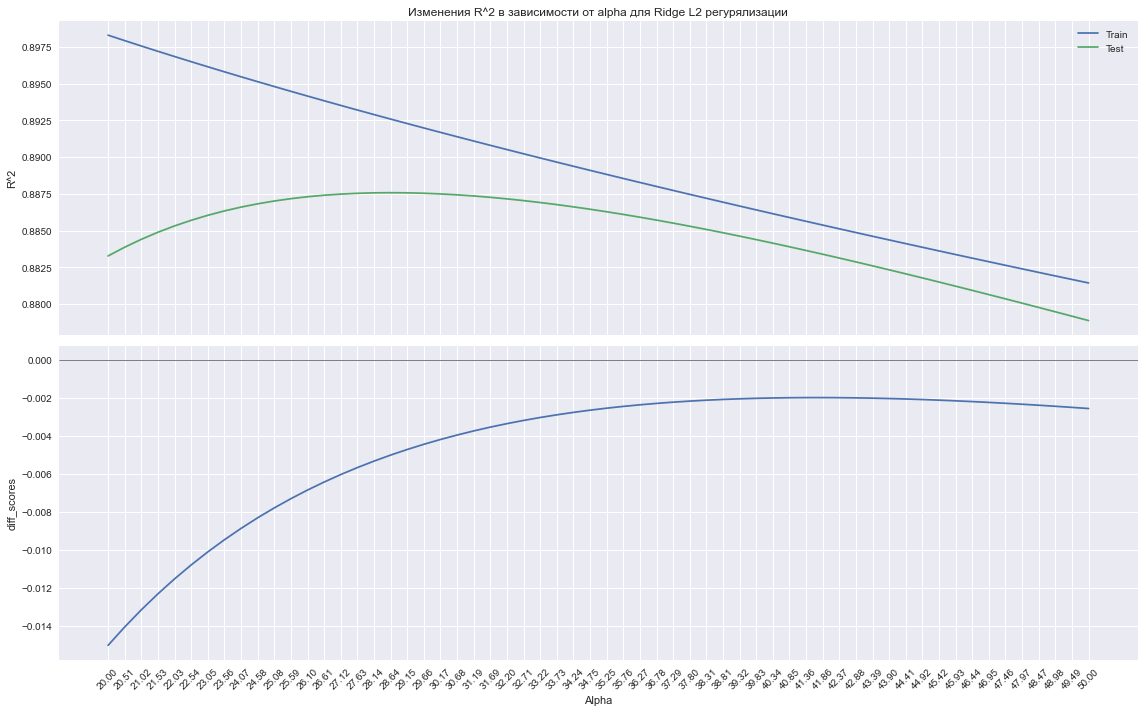

In [65]:
# Визуализируем изменение R^2 в зависимости от alpha
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(16, 10), sharex=True) # фигура + координатная плоскость
ax0.set_title('Изменения R^2 в зависимости от alpha для Ridge L2 регурялизации')
ax0.plot(alpha_list, train_scores, label='Train') # линейный график для тренировочной выборки
ax0.plot(alpha_list, test_scores, label='Test') # линейный график для тестовой выборки
ax1.plot(alpha_list, scores_df['diff_scores'])

ax1.set_xlabel('Alpha') # название оси абсцисс
ax0.set_ylabel('R^2') # название оси ординат
ax1.set_ylabel('diff_scores') # название оси ординат

ax1.set_xticks(alpha_list) # метки по оси абсцисс
ax1.xaxis.set_tick_params(rotation=45) # поворот меток на оси абсцисс
ax1.axhline(0, color='black', linewidth=0.5)

ax0.legend() # отображение легенды

plt.tight_layout();


In [66]:
alpha = 28.644068
# Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=alpha)

# Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

# Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.893
Test R^2: 0.888
